Mục tiêu: kiểm tra file `crawled_all_shops/data_hcm_huy_final.csv` merge đúng chưa

---

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
data_hcm_huy = pd.read_csv('./crawled_all_shops/data_hcm_huy_final.csv')
print(data_hcm_huy.shape)
data_hcm_huy.head()

# Khám phá dữ liệu

## Kiểm tra dòng trùng

In [ ]:
print('trùng trên toàn bộ thuộc tính:', data_hcm_huy.duplicated().sum())
print('trùng trên thuộc tính RestaurantId:', data_hcm_huy['RestaurantId'].dropna().duplicated().sum())

trùng trên toàn bộ thuộc tính: 0
trùng trên thuộc tính RestaurantId: 0


## Kiểu dữ liệu mỗi cột

In [ ]:
data_hcm_huy.dtypes

RestaurantId         float64
Name                  object
Address               object
District              object
City                  object
RestaurantStatus     float64
Latitude             float64
Longitude            float64
TotalReviews         float64
nExcellentReviews    float64
nGoodReviews         float64
nAverageReviews      float64
nBadReviews          float64
LocationScore        float64
PriceScore           float64
QualityScore         float64
ServingScore         float64
SpaceScore           float64
AvgScore             float64
TotalPictures        float64
TotalViews           float64
TotalSaves           float64
IsBooking               bool
IsDelivery              bool
PrepTime              object
Capacity              object
LastHourCustomer      object
ExtraInfo             object
Active                  bool
TotalFavourites      float64
TotalCheckIns        float64
Comment               object
dtype: object

## Phân bố giá trị

### Thuộc tính numerical

In [ ]:
num_cols = data_hcm_huy.select_dtypes([np.float64]).columns
def missing_ratio(s):
    return s.isna().sum() * 100 / len(s)

data_hcm_huy[num_cols].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])

,RestaurantId,RestaurantStatus,Latitude,Longitude,TotalReviews,nExcellentReviews,nGoodReviews,nAverageReviews,nBadReviews,LocationScore,PriceScore,QualityScore,ServingScore,SpaceScore,AvgScore,TotalPictures,TotalViews,TotalSaves,TotalFavourites,TotalCheckIns
missing_ratio,0.000000e+00,0.0,0.003224,0.002149,45.025632,62.678001,62.678001,62.678001,62.678001,62.678001,62.678001,62.678001,62.678001,62.678001,45.025632,0.0,0.0,0.0,73.844401,73.844401
min,2.000000e+00,2.0,-0.001451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000
max,1.000059e+09,4.0,106.656876,108.458313,1513.000000,1290.000000,1045.000000,428.000000,719.000000,10.000000,10.000000,10.000000,10.000000,10.000000,143.000000,12488.0,459463.0,11100.0,603.000000,200.000000
nunique,9.304700e+04,2.0,82345.000000,83111.000000,469.000000,195.000000,302.000000,158.000000,106.000000,92.000000,93.000000,92.000000,93.000000,93.000000,96.000000,1267.0,9711.0,970.0,246.000000,67.000000


$\to$ max của `AvgScore` vô lý, phải từ 0-10. Có thể cào sai, sửa lại bằng cách lấy TB 5 cột điểm bên trái nó

In [ ]:
data_hcm_huy['AvgScore'] = (data_hcm_huy['LocationScore'] + data_hcm_huy['PriceScore'] \
    + data_hcm_huy['PriceScore'] + data_hcm_huy['PriceScore'] + data_hcm_huy['PriceScore'])/5
data_hcm_huy['AvgScore'].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])    

missing_ratio     62.678001
min                0.000000
max               10.000000
nunique          683.000000
Name: AvgScore, dtype: float64

### Thuộc tính category

In [ ]:
cat_cols = data_hcm_huy.select_dtypes(include=["object"])
cat_cols.apply([missing_ratio, pd.Series.nunique, pd.Series.unique])

,Name,Address,District,City,PrepTime,Capacity,LastHourCustomer,ExtraInfo,Comment
missing_ratio,0.0,0.0,0.0,0.0,0.099949,36.163444,76.837512,20.108117,0.148312
nunique,92629,81690,24,1,108,151,141,3056,34665
unique,[Crystal Jade Palace - Lotte Legend Saigon Hot...,"[Legend Hotel, 2A - 4A Tôn Đức Thắng, P. Bến N...","[Quận 1, Tp. Thủ Đức, Quận 10, Quận 2, Quận 7,...",[TP. HCM],"[['5', '10'], ['10', '15'], ['10', '30'], ['10...","[150.0, 202.0, 200.0, 400.0, 90.0, 75.0, 100.0...","[22:00, 21:45, 23:00, 00:30, 01:30, 23:30, 21:...","[Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ...",[{'Crystal Jade Palace - Lotte Legend Saigon H...


## Save to file

In [ ]:
data_hcm_huy.to_csv('crawled_all_shops/data_hcm_final.csv', index = False, header=True, encoding='utf-8')

# Merge detail.csv & data_hcm_final.csv

In [ ]:
data_hcm = pd.read_csv('./crawled_all_shops/data_hcm_final.csv')
details = pd.read_csv('./crawled_shop_details/details.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\713071988.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data_hcm = pd.read_csv('./crawled_all_shops/data_hcm_final.csv')


In [ ]:
data_hcm.shape, details.shape

((93047, 32), (54537, 14))

In [ ]:
data_hcm = data_hcm.astype({"RestaurantId": int}, errors='raise') 
data_hcm = data_hcm.astype({"RestaurantId": str}, errors='raise')
data_hcm['RestaurantId'].dtype

In [ ]:
result = pd.merge(data_hcm, details, how='left', left_on=['RestaurantId'], right_on = ['request_id'])
print(result.shape)
result.head()

In [ ]:
result.drop(['is_foody_delivery'], axis=1)

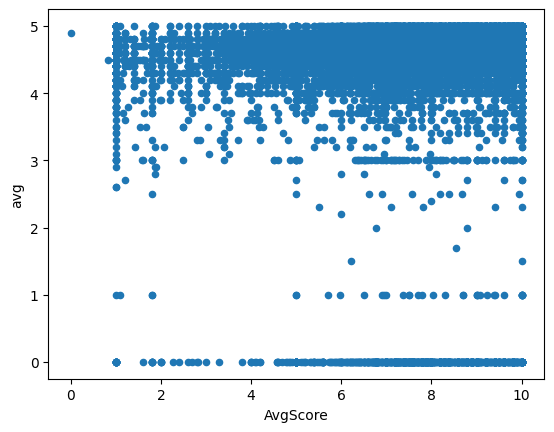

In [ ]:
import matplotlib.pyplot as plt

result.plot.scatter(x='AvgScore', y='avg');

In [ ]:
import json
import requests

In [ ]:
promotion_df = result.dropna(subset='promotion')
# promotion_df.head()
def to_json(s):
    try:
        json_valid_form = s.replace("'", "\"").replace("False", "\"False\"").replace("True", "\"True\"")
        return json.loads(json_valid_form)
    except Exception as e:
        print(e)
        print(json_valid_form[3800:4000])
        print(json_valid_form[3943])
        re
    
for ix in promotion_df.index:
    s = promotion_df['promotion'][ix]
    to_json(s)

In [197]:
def get_promotion(res_id):
    detail_API = requests.get(f"https://gappapi.deliverynow.vn/api/delivery/get_detail?request_id={res_id}&id_type=1", 
                                headers={'x-foody-api-version': '1',
                                        'x-foody-app-type': '1004',
                                        'x-foody-client-language': 'vi',
                                        'x-foody-client-type': '1',
                                        'x-foody-client-version': '1',
                                        'X-Foody-Client-Id': 'cookies.__ondemand_sessionid'
                                        }
                            )
    data = detail_API.text

    try:
        dataJson = json.loads(data)
        detail_infos = dataJson['reply']['delivery_detail']
        promotion = detail_infos['delivery']['promotions']
        return {
                'RestaurantId': res_id,
                'promo_code': promotion['promo_code'],
                'max_discount_value': promotion['max_discount_value'],
                'min_order_amount': promotion['min_order_amount'],
                'max_usage_time': promotion['user_condition']['limit_per_user'][0]['max_usage_time'],
                'expired': promotion['expired'],
                'apply_order': promotion['apply_order'],
                'promo_description': promotion['title']['message']
            }
    except:
        return

In [198]:
ls = []
for id in result['RestaurantId']:
    ls.append(get_promotion(id))
len(ls)

93047

In [ ]:
str = result['promotion'].dropna()[16].replace("'", "\"")
str = str.replace("False", "\"False\"")
promotion_ls = json.loads(str)

# for 
for promotion in promotion_ls:
    promo_code = promotion['promo_code']
    max_discount_value = promotion['max_discount_value']
    min_order_amount = promotion['min_order_amount']
    max_usage_time = promotion['user_condition']['limit_per_user'][0]['max_usage_time']
    expired = promotion['expired']
    apply_order = promotion['apply_order']
    promo_description = promotion['title']['message']

In [30]:
result = result.astype({"avg": np.float64}, errors='raise')
result[['AvgScore', 'avg']].dtypes

AvgScore    float64
avg         float64
dtype: object

In [62]:
result.shape

(93047, 47)

In [63]:
result.to_csv('crawled_all_shops/data_hcm_final.csv', index = False, header=True, encoding='utf-8')

# Merge Checkins.csv
Lấy thêm bình luận bằng cách cào mục check-in & comment

In [2]:
data_hcm = pd.read_csv('crawled_all_shops/data_hcm_final.csv')
extra_rv = pd.read_csv('crawled_all_shops/CheckIns.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8780\4099083350.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data_hcm = pd.read_csv('crawled_all_shops/data_hcm_final.csv')


In [11]:
extra_rv.drop('Unnamed: 0', axis=1, inplace=True)

In [45]:
extra_rv.loc[0, 'CheckIns']

"{'Checked-in': 'Awesome!!!! 😍👌🏻✌🏻️💙💙💙', 'Awesome!': 'Love it so much!!! 💋💋💋', 'Crystal Jade Palace - Lotte Legend Saigon Hotel': 'Ngon, chất lượng, rất thích ăn dimsum ở đây 😁'}"

In [37]:
all_comments = data_hcm['Comment'].apply(lambda x: eval(x) if x == x else "")
len_comments = all_comments.apply(lambda x: len(x))
len_comments.unique

<bound method Series.unique of 0         9
1        17
2        34
3        64
4        76
         ..
93042     0
93043     0
93044     0
93045     0
93046     0
Name: Comment, Length: 93047, dtype: int64>

<AxesSubplot: ylabel='Frequency'>

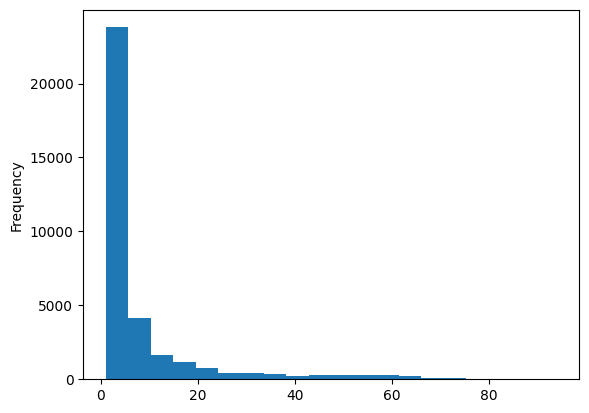

In [43]:
len_comments[len_comments>0].plot.hist(bins=20)